In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
# Ruta del archivo ZIP que deseas descomprimir en Google Drive
ruta_zip = '/content/drive/MyDrive/HOJAS/Hojas-20240131T050046Z-001.zip'  # Cambia esta ruta por la de tu archivo ZIP

# Ruta de la carpeta donde deseas extraer los archivos
ruta_destino = '/content/descomprimido/'  # Cambia esta ruta según tus preferencias

# Descomprimir el archivo ZIP
with zipfile.ZipFile(ruta_zip, 'r') as archivo_zip:
    archivo_zip.extractall(ruta_destino)

In [3]:
!pip install timm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.5 MB/s eta 0:00:00


In [4]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import timm  # Importa timm para acceder a modelos de transformers
import matplotlib.pyplot as plt

# Configuración del dispositivo para usar CUDA si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Definición de transformaciones para las imágenes
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Tamaño típico para ViT
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Función para cargar datos
def load_data(train_directory, test_directory):
    datasets = {
        "train": ImageFolder(root=train_directory, transform=transform),
        "test": ImageFolder(root=test_directory, transform=transform)
    }
    dataloaders = {
        x: DataLoader(datasets[x], batch_size=32, shuffle=True) for x in ['train', 'test']
    }
    return dataloaders

# Cargar y preparar el modelo ViT
def prepare_model(num_classes):
    # Carga un modelo ViT preentrenado. Asegúrate de elegir un modelo adecuado de timm.
    model = timm.create_model('vit_base_patch16_224', pretrained=True)
    # Ajusta la última capa al número de clases de tu conjunto de datos
    model.head = nn.Linear(model.head.in_features, num_classes)
    return model.to(device)

# Entrenamiento del modelo (esta función se mantiene igual)
def train_and_evaluate_model(model, dataloaders, epochs=5):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = total = 0

        for inputs, labels in dataloaders['train']:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(dataloaders['train']))
        train_accuracies.append(100 * correct / total)

        model.eval()
        test_loss = 0.0
        correct = total = 0
        with torch.no_grad():
            for inputs, labels in dataloaders['test']:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_losses.append(test_loss / len(dataloaders['test']))
        test_accuracies.append(100 * correct / total)

        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, '
              f'Train Accuracy: {train_accuracies[-1]:.2f}%, Test Accuracy: {test_accuracies[-1]:.2f}%')

    return train_losses, test_losses, train_accuracies, test_accuracies

# Directorios de entrenamiento y validación (ajusta estas rutas según tu configuración)
train_directory = '/content/descomprimido/Hojas/Train'
test_directory = '/content/descomprimido/Hojas/Test'
# Cargar datos de entrenamiento y validación
dataloaders = load_data(train_directory, test_directory)

# Definir el número de clases
num_classes = 3  # Ajusta esto según tu conjunto de datos específico

# Preparar y entrenar el modelo
model = prepare_model(num_classes)
# Ejecutar entrenamiento y evaluación
#train_losses, test_losses, train_accuracies, test_accuracies = train_and_evaluate_model(model, dataloaders, epochs=20)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Epoch 1/20, Train Loss: 1.1409, Test Loss: 0.3417, Train Accuracy: 63.61%, Test Accuracy: 85.47%
Epoch 2/20, Train Loss: 0.3095, Test Loss: 0.0938, Train Accuracy: 89.21%, Test Accuracy: 97.58%
Epoch 3/20, Train Loss: 0.1660, Test Loss: 0.1449, Train Accuracy: 94.85%, Test Accuracy: 94.43%
Epoch 4/20, Train Loss: 0.1341, Test Loss: 0.0626, Train Accuracy: 95.69%, Test Accuracy: 98.06%
Epoch 5/20, Train Loss: 0.1651, Test Loss: 0.1167, Train Accuracy: 94.30%, Test Accuracy: 97.34%
Epoch 6/20, Train Loss: 0.0698, Test Loss: 0.0838, Train Accuracy: 97.70%, Test Accuracy: 97.09%
Epoch 7/20, Train Loss: 0.1058, Test Loss: 0.0511, Train Accuracy: 96.79%, Test Accuracy: 98.06%
Epoch 8/20, Train Loss: 0.0424, Test Loss: 0.0554, Train Accuracy: 98.73%, Test Accuracy: 97.58%
Epoch 9/20, Train Loss: 0.0566, Test Loss: 0.0453, Train Accuracy: 97.88%, Test Accuracy: 98.79%
Epoch 10/20, Train Loss: 0.0422, Test Loss: 0.1864, Train Accuracy: 98.61%, Test Accuracy: 94.92%
Epoch 11/20, Train Loss: 0.04

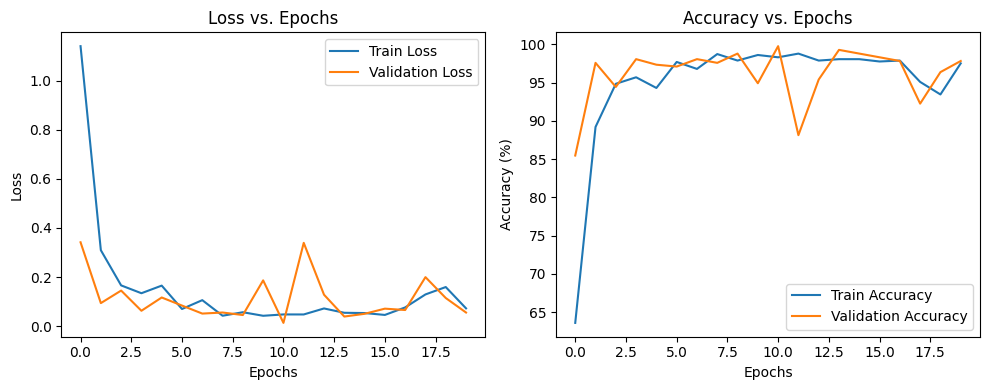

In [5]:
# Ejecutar entrenamiento y evaluación
train_losses, test_losses, train_accuracies, test_accuracies = train_and_evaluate_model(model, dataloaders, epochs=20)

# Graficar pérdidas
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Graficar precisión
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()